## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Train'
valid_path = '/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 49s 38s/step - loss: 4.1219 - accuracy: 0.3906 - val_loss: 8.9829 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 21s 16s/step - loss: 8.6157 - accuracy: 0.4062 - val_loss: 5.1279 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 35s 25s/step - loss: 4.8919 - accuracy: 0.3438 - val_loss: 9.4571 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 33s 26s/step - loss: 7.8801 - accuracy: 0.3125 - val_loss: 9.3551 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 33s 26s/step - loss: 5.1621 - accuracy: 0.4531 - val_loss: 8.5986 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 23s 16s/step - loss: 5.5873 - accuracy: 0.3906 - val_loss: 2.2599 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 33s 25s/step - loss: 1.5585 - accuracy: 0.4844 - val_loss: 3.6109 - val_accuracy: 0.5172
Epoch 8/50
2/2 [===========

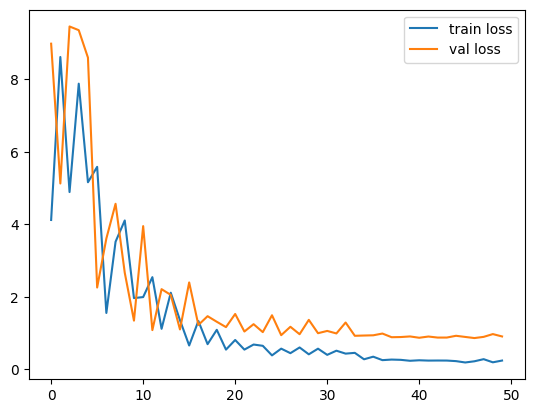

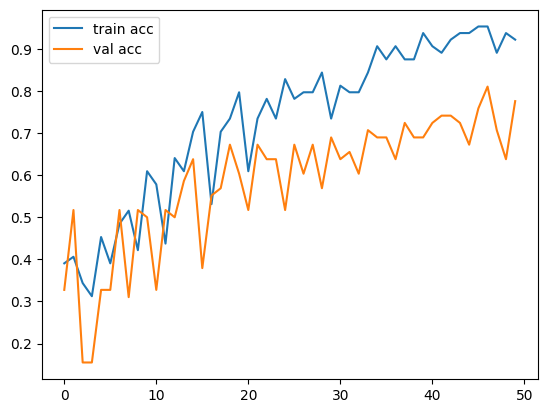

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


2/2 [==============================] - 14s 4s/step


In [18]:
y_pred

array([[3.19833471e-03, 9.47645307e-01, 4.91564162e-02],
       [4.52622259e-03, 3.18039507e-01, 6.77434206e-01],
       [1.94804874e-04, 9.53419089e-01, 4.63860407e-02],
       [9.11689922e-02, 8.73381674e-01, 3.54492925e-02],
       [8.96719918e-02, 5.69290996e-01, 3.41037065e-01],
       [3.91984999e-01, 5.03029823e-01, 1.04985185e-01],
       [8.18284605e-07, 9.69718894e-05, 9.99902189e-01],
       [8.37601721e-03, 7.68473387e-01, 2.23150626e-01],
       [3.57678602e-03, 9.50316727e-01, 4.61064428e-02],
       [3.15259427e-01, 6.77834153e-01, 6.90649729e-03],
       [4.25789207e-02, 1.60989821e-01, 7.96431243e-01],
       [5.72945699e-02, 6.74084008e-01, 2.68621445e-01],
       [7.09012570e-03, 9.62530255e-01, 3.03796250e-02],
       [7.38334109e-07, 7.44462130e-04, 9.99254823e-01],
       [5.46566480e-05, 9.97617781e-01, 2.32748548e-03],
       [8.85241013e-03, 2.79913723e-01, 7.11233854e-01],
       [2.19053086e-02, 5.61402202e-01, 4.16692495e-01],
       [4.06761095e-03, 9.70485

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2])

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [25]:
img=image.load_img('/content/drive/MyDrive/ĐỒ ÁN MÔN HỌC /Kĩ thuật lập trình Python/Datasets_v2/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
# img_data

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1